# Keras API 

LendingClub is a US peer-to-peer lending company.
# Goal of this 
We want to analyse the data set, build a model and predict wether a borrower will pay back their loan or not. 

In [1]:
# Importing required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

C:\Users\scc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\scc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\scc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\scc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

In [2]:
# Here is a CSV file that interprets the features of main data set

data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
data_info.head(10)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [3]:
# Main data set

df = pd.read_csv('lending_club_loan_two.csv')

In [4]:
# The first five rows

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
# Two states of the loan

print(df["loan_status"].value_counts())
print("\n ***************")
df["loan_status"]

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

 ***************


0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [6]:
# Some information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  


#  Exploratory Data Analysis

We want to know which variables are important and visualize the data.


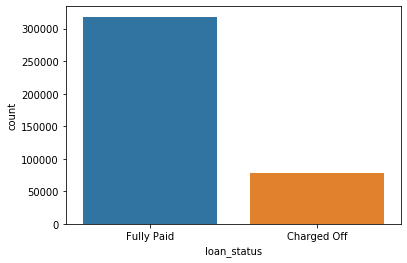

In [7]:
# Intuition of main feature
sns.countplot("loan_status", data=df)

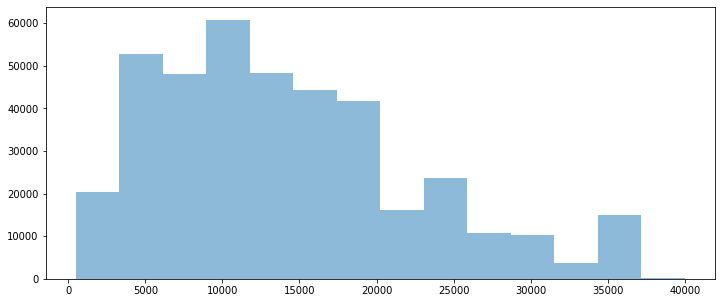

In [8]:
# A  histogram of the loan_amnt column

plt.figure(figsize=(12,5))
df["loan_amnt"].hist(grid=False, alpha=0.5,bins=14)
plt.xlabel="loan_amnt"

In [9]:
# Correlation between the continuous feature variables
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


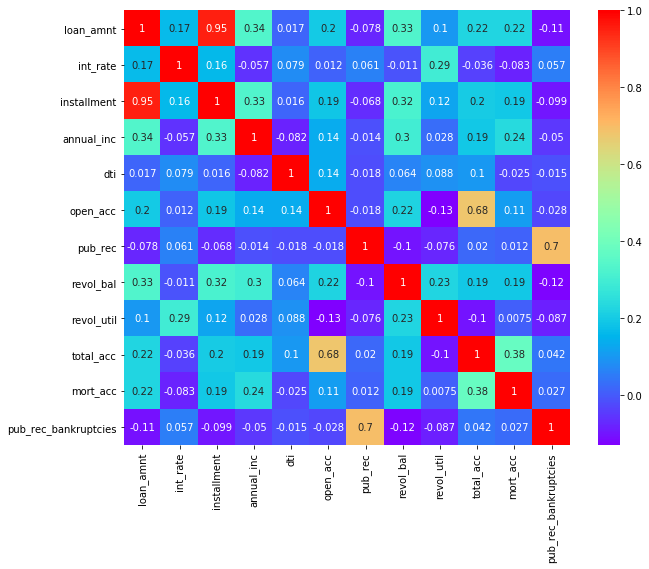

In [10]:
# Visualization of the correlation by using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), cmap="rainbow",annot=True)

In [11]:
# Strong correlation between "installment" and "loan_amnt" 

In [12]:
# What is "installment" feature?
data_info.loc["installment"]

Description    The monthly payment owed by the borrower if th...
Name: installment, dtype: object

In [13]:
data_info.loc["loan_amnt"]

Description    The listed amount of the loan applied for by t...
Name: loan_amnt, dtype: object

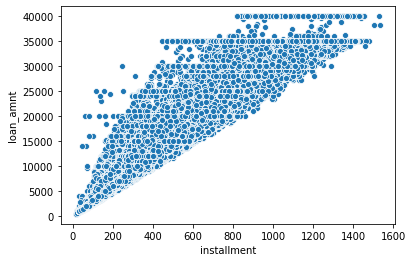

In [14]:
# Visualization of the relation between "installment" and "loan_amnt" by scatterplot
sns.scatterplot(x='installment',y='loan_amnt',data=df)

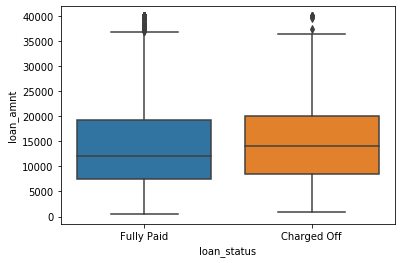

In [15]:
# Visualization of the relation between "installment" and "loan_amnt" by boxplot
sns.boxplot(x="loan_status",y="loan_amnt", data=df)

In [16]:
# Statistical information of "loan_amount" related to each group of "loan_status"
df.groupby("loan_status").describe()["loan_amnt"]

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [17]:
# Unique data of "grade" and "sub_grade"

In [18]:
data_info.loc["grade"]

Description    LC assigned loan grade
Name: grade, dtype: object

In [19]:
sorted(df["grade"].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
sorted(df["sub_grade"].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

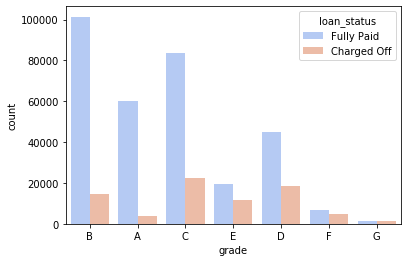

In [21]:
# Countplot for each grade setting the hue to the loan_status label
sns.countplot(x="grade", data=df, hue="loan_status",palette="coolwarm")

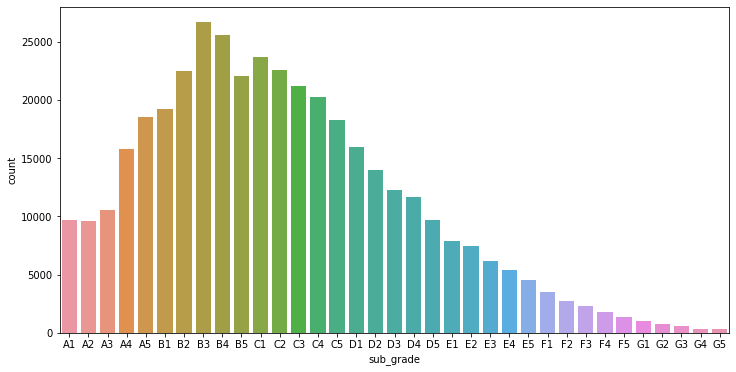

In [22]:
# Countplot of sorted subgrades.
plt.figure(figsize=(12,6))
sns.countplot("sub_grade",data=df,order=sorted(df['sub_grade'].unique()))

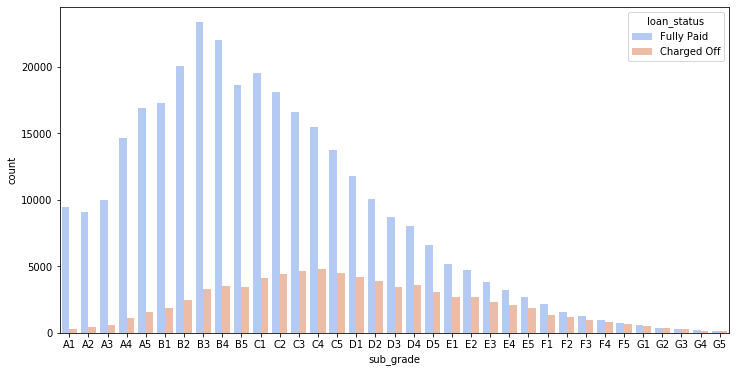

In [23]:
# hue="loan_status"
plt.figure(figsize=(12,6))
sns.countplot("sub_grade",data=df,order=sorted(df['sub_grade'].unique()),hue="loan_status",palette="coolwarm")

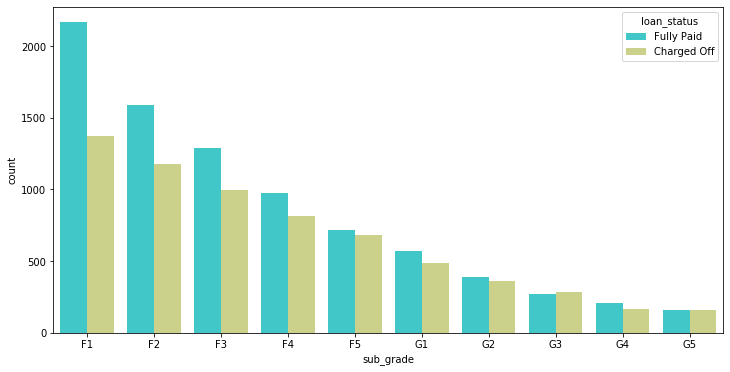

In [24]:
# Countplot for F and G subgrades considering loan status
df_FG=df[(df["grade"]=="F") | (df["grade"]=="G")]
plt.figure(figsize=(12,6))
sns.countplot("sub_grade",data=df_FG,order=sorted(df_FG['sub_grade'].unique()),hue="loan_status",palette="rainbow")

In [25]:
# Making a new column "loan_repaid" and assigning numeric values to the "loan_status"
df['loan_repaid']= df["loan_status"].map({'Fully Paid':1,'Charged Off':0})

In [26]:
df[["loan_repaid","loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


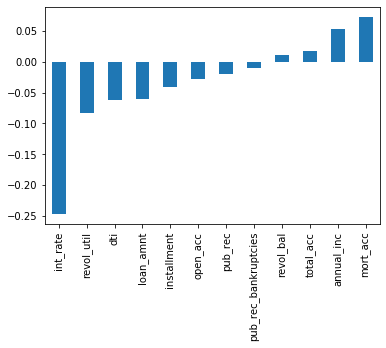

In [27]:
# A barplot showing the correlation of the numeric features to the new "loan_repaid" column
df.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind="bar")



# Data PreProcessing

 Removing or filling any missing data, unnecessary or repetitive features and converting categorical string features to dummy variable



In [28]:
# Dataframe
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1


In [29]:
# The length of the dataframe
df.shape[0]

396030

### **Dealing with the missing values

In [30]:
# Missing values
df.isnull()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# The total count of missing values of each column
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [32]:
# percentage of missing values
df.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [33]:
# "emp_title" feature
data_info.loc["emp_title"]

Description    The job title supplied by the Borrower when ap...
Name: emp_title, dtype: object

In [34]:
# "emp_length" feature
data_info.loc["emp_length"]

Description    Employment length in years. Possible values ar...
Name: emp_length, dtype: object

In [35]:
# Number of unique employment job titles
df["emp_title"].value_counts()

Teacher                                  4389
Manager                                  4250
Registered Nurse                         1856
RN                                       1846
Supervisor                               1830
                                         ... 
Production Planner Purchasing Analyst       1
GIS Programmer                              1
Blessing Hospital                           1
Associate  Insurance Rate Analyst           1
Warehouse  Associate                        1
Name: emp_title, Length: 173105, dtype: int64

In [36]:
# Removing the emp_title column
df=df.drop("emp_title",axis=1)

In [37]:
# Sorted "emp_length" feature
emp_title_sorted = [ '< 1 year', '1 year','2 years','3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']


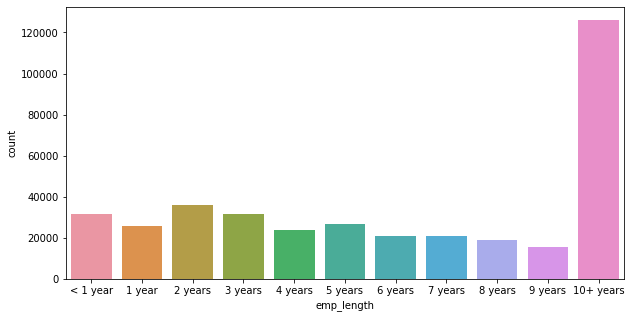

In [38]:
# Count plot of the "emp_length" feature column according to sorted order of the values
plt.figure(figsize=(10,5))
sns.countplot("emp_length", data=df, order=emp_title_sorted)

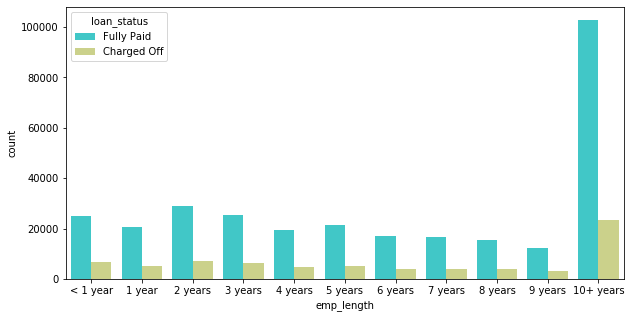

In [39]:
# Countplot with a hue separating Fully Paid versus Charged Off
plt.figure(figsize=(10,5))
sns.countplot("emp_length", data=df, order=emp_title_sorted, hue="loan_status", palette="rainbow")

In [40]:
# What percent of people per employment category didn't pay back their loan?
df_loan_length=df[["loan_status", "emp_length"]]
l1=df_loan_length[df_loan_length["loan_status"]=="Fully Paid"].groupby(by="emp_length").count()['loan_status']
l2=df_loan_length[df_loan_length["loan_status"]=="Charged Off"].groupby(by="emp_length").count()['loan_status']
percent=l2/(l1+l2)
percent

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

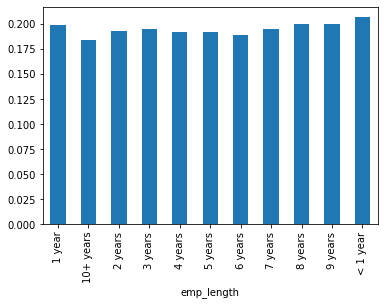

In [41]:
# By barplot of "percent" the same percentage of each group of "emp_length" is more obvious
percent.plot(kind="bar")

In [42]:
# Since charge off rates are extremely similar across all employment lengths we drop the emp_length column
df = df.drop('emp_length',axis=1)

In [43]:
# Revisiting the missing data of DataFrame
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [44]:
# Reviewing the title column versus the purpose column. This is repeated information
df[['purpose','title']].head(20)

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
5,debt_consolidation,Debt consolidation
6,home_improvement,Home improvement
7,credit_card,No More Credit Cards
8,debt_consolidation,Debt consolidation
9,debt_consolidation,Debt Consolidation


In [45]:
# Removing the "title" column.
df = df.drop('title',axis=1)

In [46]:
# The "mort_acc" feature
data_info.loc["mort_acc"]

Description    Number of mortgage accounts.
Name: mort_acc, dtype: object

In [47]:
# A value_counts of the "mort_acc" column
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [48]:
# Relation between the "mort_acc" feature and others
# The "total_acc" feature correlates with the "mort_acc"
df.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [49]:
# The "total_acc" feature
data_info.loc["total_acc"]

Description    The total number of credit lines currently in ...
Name: total_acc, dtype: object

In [50]:
# Grouping the dataframe by the "total_acc" and calculate the mean value for the "mort_acc" per "total_acc" entry
df.groupby(by="total_acc").mean()["mort_acc"]

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [51]:
# Filling in the missing "mort_acc" values based on their "total_acc" value with the mean value corresponding to "total_acc" value

In [52]:
df_group_total_acc=df.groupby(by="total_acc").mean()["mort_acc"]
df_group_total_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [53]:
df[df['mort_acc'].isnull()]['mort_acc']

22       NaN
25       NaN
32       NaN
41       NaN
62       NaN
          ..
395991   NaN
395995   NaN
396016   NaN
396021   NaN
396029   NaN
Name: mort_acc, Length: 37795, dtype: float64

In [54]:
np.isnan(df.loc[22,'mort_acc'])

True

In [57]:
def fill(a,b):
# a and b are two values
    if np.isnan(a):
        return df_group_total_acc[b]
    else:
        return a

In [58]:
# x is one row of df
df["mort_acc"] = df.apply(lambda x: fill(x["mort_acc"], x["total_acc"]),axis=1)

In [59]:
# The "revol_util" and the "pub_rec_bankruptcies" have missing data
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [60]:
# The "revol_util" and the "pub_rec_bankruptcies" account for less than 0.5% of the total data
# Removing the rows that are missing those values

In [61]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

### **Dealing with the string values




In [63]:
# The columns that are currently non-numeric
df.select_dtypes("object").columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### "term"

In [64]:
# Converting the "term" feature into either a 36 or 60 integer numeric data type

In [65]:
df["term"].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [66]:
df["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [67]:
df["term"]= df["term"].map({" 36 months":36," 60 months":60 })

C:\Users\scc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df["term"]

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

### "grade"

In [69]:
# Since we have "sub_grade" feature, we can remove the "grade" column

In [70]:
df = df.drop("grade",axis=1)

### "sub_grade"

In [71]:
# Converting the "sub_grade" into dummy variables

In [72]:
subgrade_dummy=pd.get_dummies(df["sub_grade"],drop_first=True)
subgrade_dummy

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Removing the "sub_grade" column
df = pd.concat([df.drop("sub_grade",axis=1),subgrade_dummy],axis=1)

In [74]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### "verification_status", "application_type", "initial_list_status", "purpose" 

In [75]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [76]:
# Converting these columns into dummy variables
dummies3 = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies3],axis=1)

In [77]:
# Non numeric remaining values
df.select_dtypes("object").columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### "home_ownership"

In [78]:
# value_counts for the "home_ownership" column
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [79]:
# Changing  "NONE" and "ANY" into "OTHER"
df["home_ownership"]=df["home_ownership"].replace(["NONE", "ANY"], "OTHER")

In [80]:
#Converting to dummy variables
home_ownership_dummy = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,home_ownership_dummy ],axis=1)

### "address"

In [81]:
df["address"]

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [82]:
# Creating  a new column 'zip_code' and extracting  the zip code from the "address" column
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [83]:
df["zip_code"].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [84]:
# Converting "zip_code" column into dummy variables
zip_code_dummy=pd.get_dummies(df["zip_code"], drop_first=True)
df=df.drop(["zip_code","address"], axis=1)
df=pd.concat([df, zip_code_dummy], axis=1)

### "issue_d" 

In [85]:
df["issue_d"]

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [86]:
# When using our model we wouldn't know whether or not a loan would be issued , so we will drop it.

In [87]:
df=df.drop("issue_d", axis=1)

In [88]:
df.select_dtypes("object").columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

### "earliest_cr_line"

In [89]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [90]:
#  Extracting the year from this feature and converting it to a numeric feature
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda year: int(year[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [91]:
# Remaining non numeric data
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

In [92]:
# Importing train_test_split from sklearn
from sklearn.model_selection import  train_test_split

In [93]:
# Removing  the load_status column
df = df.drop('loan_status',axis=1)

In [94]:
# Setting X and y variables 
y = df['loan_repaid'].values
X = df.drop('loan_repaid',axis=1).values
print(type(X))

<class 'numpy.ndarray'>


In [95]:
X

array([[1.000e+04, 3.600e+01, 1.144e+01, ..., 0.000e+00, 0.000e+00,
        1.990e+03],
       [8.000e+03, 3.600e+01, 1.199e+01, ..., 0.000e+00, 0.000e+00,
        2.004e+03],
       [1.560e+04, 3.600e+01, 1.049e+01, ..., 0.000e+00, 0.000e+00,
        2.007e+03],
       ...,
       [5.000e+03, 3.600e+01, 9.990e+00, ..., 0.000e+00, 0.000e+00,
        1.997e+03],
       [2.100e+04, 6.000e+01, 1.531e+01, ..., 0.000e+00, 0.000e+00,
        1.990e+03],
       [2.000e+03, 3.600e+01, 1.361e+01, ..., 0.000e+00, 0.000e+00,
        1.998e+03]])

In [96]:
# Grabbing a Sample for Training Time
# Because of lower RAM computers we use a part of data set
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39522


In [97]:
# Train and test sets 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=101)

### Normalizing the Data



In [98]:
# Importing MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [99]:
scale=MinMaxScaler()

In [100]:
scale.fit_transform(X_train)

array([[0.22307692, 0.        , 0.46552396, ..., 0.        , 0.        ,
        0.89855072],
       [0.48717949, 0.        , 0.32450331, ..., 0.        , 0.        ,
        0.85507246],
       [0.31666667, 1.        , 0.46552396, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.19358974, 0.        , 0.16945851, ..., 0.        , 0.        ,
        0.8115942 ],
       [0.28205128, 1.        , 0.4253993 , ..., 0.        , 0.        ,
        0.79710145],
       [0.87179487, 0.        , 0.57148422, ..., 0.        , 0.        ,
        0.76811594]])

In [101]:
scale.transform(X_test)

array([[0.35384615, 0.        , 0.51305025, ..., 0.        , 0.        ,
        0.69565217],
       [0.76923077, 1.        , 0.47721075, ..., 0.        , 0.        ,
        0.75362319],
       [0.53846154, 1.        , 0.10011687, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.1025641 , 0.        , 0.2384106 , ..., 0.        , 0.        ,
        0.92753623],
       [0.48974359, 1.        , 0.74678613, ..., 0.        , 0.        ,
        0.79710145],
       [0.34358974, 1.        , 0.16945851, ..., 1.        , 0.        ,
        0.84057971]])

### Creating the Model

In [102]:
# Importing keras features
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39522 entries, 204901 to 160674
Data columns (total 79 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            39522 non-null  float64
 1   term                                 39522 non-null  int64  
 2   int_rate                             39522 non-null  float64
 3   installment                          39522 non-null  float64
 4   annual_inc                           39522 non-null  float64
 5   dti                                  39522 non-null  float64
 6   open_acc                             39522 non-null  float64
 7   pub_rec                              39522 non-null  float64
 8   revol_bal                            39522 non-null  float64
 9   revol_util                           39522 non-null  float64
 10  total_acc                            39522 non-null  float64
 11  mort_acc              

In [104]:
# Building a sequential model 
model = Sequential()

#input

model.add(Dense(78, activation="relu"))
model.add(Dropout(0.2))

#hidden

model.add(Dense(39, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(19, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

# Compiling the model
model.compile(loss="binary_crossentropy",optimizer="adam" )

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [105]:
# Training the model using the batch-size of 256 and 25 epochs of training
model.fit(x=X_train, y=y_train, epochs=25,batch_size=256,validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 7s 23us/sample - loss: 42.0865 - val_loss: 0.5176
Epoch 2/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.6564 - val_loss: 0.4978
Epoch 3/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.5631 - val_loss: 0.4978
Epoch 4/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.5139 - val_loss: 0.4978
Epoch 5/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.5093 - val_loss: 0.4978
Epoch 6/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.5044 - val_loss: 0.4978
Epoch 7/25
316175/316175 [==============================] - 6s 17us/sample - loss: 0.4975 - val_loss: 0.4978
Epoch 8/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.4963 -

In [106]:
# Saving the model
from tensorflow.keras.models import load_model
model.save('FUll_Project.h5') 

### Evaluating Model Performance

In [ ]:
# Computing the loss of the model
loss=pd.DataFrame(model.history.history)

In [ ]:
# Plotting the validation loss versus the training loss
loss[['loss','val_loss']].plot()

### Predicting the test data

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 

In [ ]:
predictions=model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
# Prediction the loan status for a random customer

In [ ]:
# Choosing a random customer
import random
random.seed(101)
randomNum = random.randint(0,len(df))

random_customer = df.drop('loan_repaid',axis=1).iloc[randomNum]
random_customer

In [ ]:
random_customer.values.reshape(1,78)